# Forest Fires Dataset

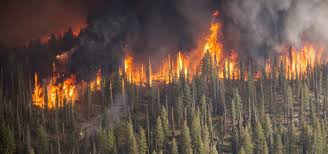

## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime 

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction


## Statsmodel
import statsmodels.api as sm

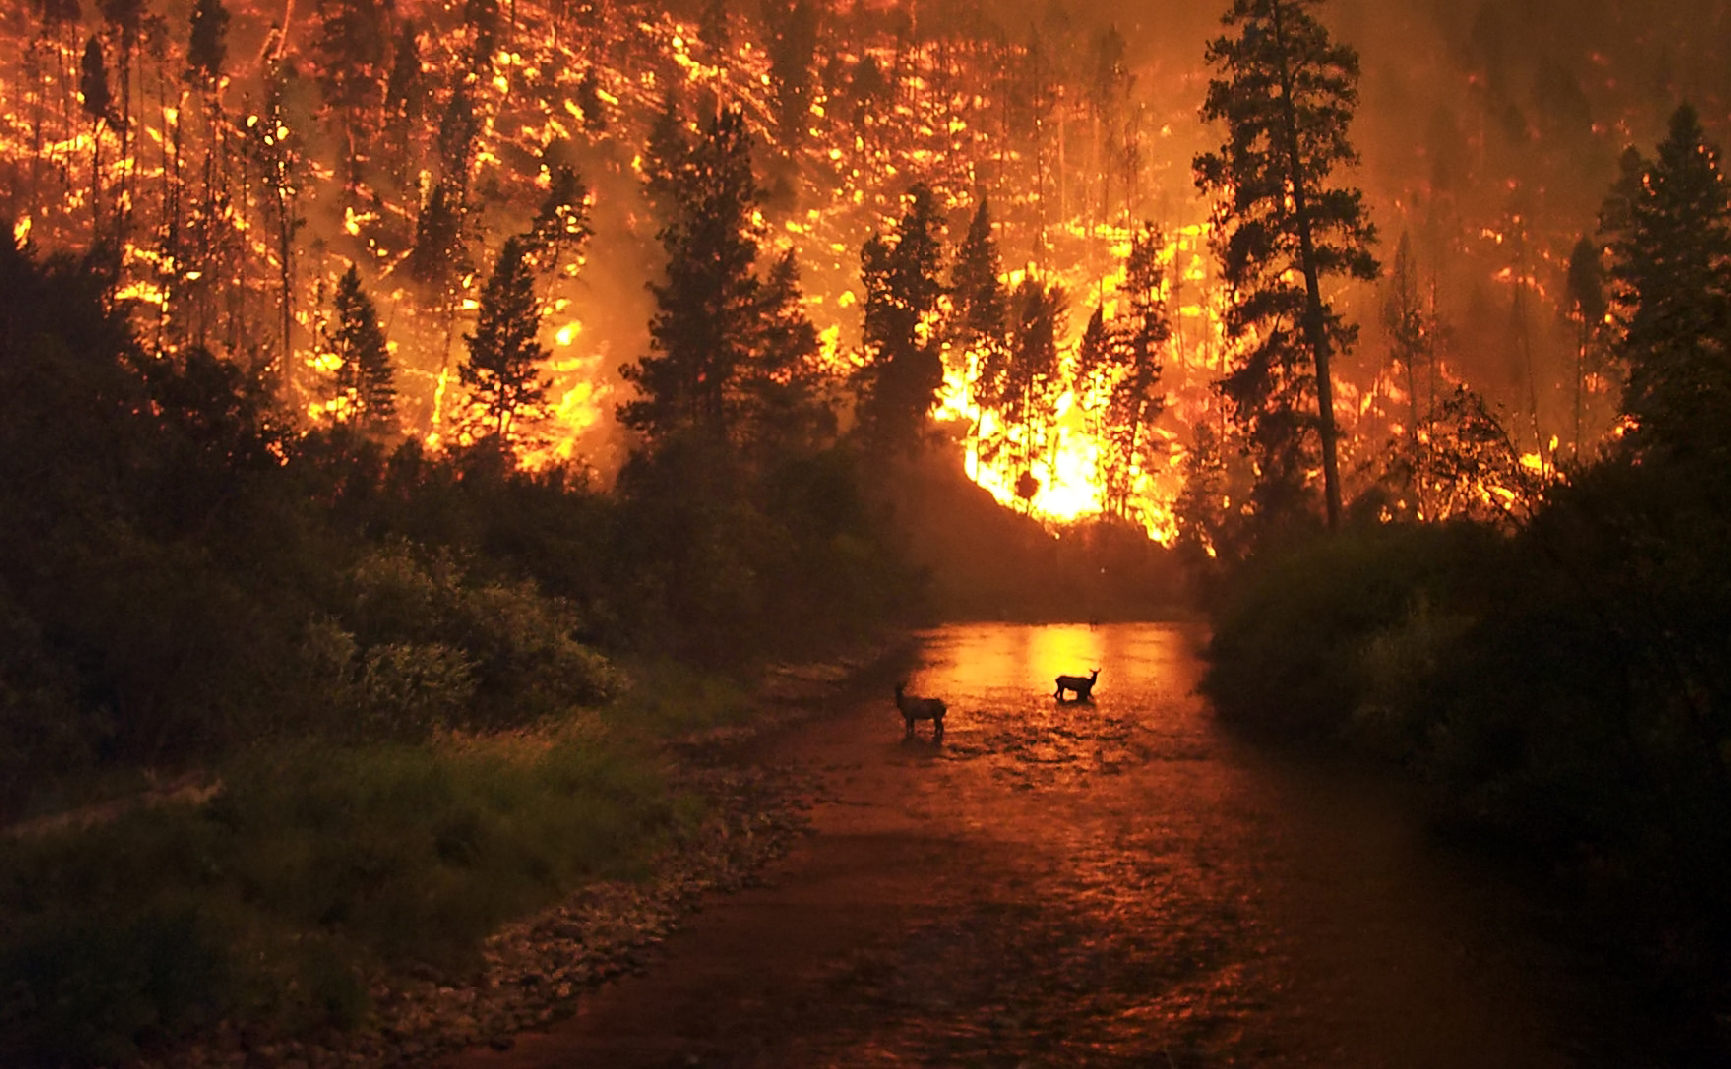

## Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\forestfires.csv")

## Basic Checks

In [3]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

In [4]:
df.tail()

X    Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3.0   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4.0   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4.0   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4.0   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3.0   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

In [5]:
df.shape

(517, 13)

In [6]:
df.size

6721

In [7]:
pd.DataFrame(list(df)) 

0
0       X
1       Y
2   month
3     day
4    FFMC
5     DMC
6      DC
7     ISI
8    temp
9      RH
10   wind
11   rain
12   area

## Domain Analysis

***1) X - x-axis spatial coordinate within the Montesinho park map: 1 to 9***

***2) Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9***

***3) month - month of the year: "jan" to "dec"***

***4) day - day of the week: "mon" to "sun"***

***5) FFMC - FFMC index from the FWI system: 18.7 to 96.20***

***6) DMC - DMC index from the FWI system: 1.1 to 291.3***

***7) DC - DC index from the FWI system: 7.9 to 860.6***

***8) ISI - ISI index from the FWI system: 0.0 to 56.10***

***9) temp - temperature in Celsius degrees: 2.2 to 33.30***

***10) RH - relative humidity in %: 15.0 to 100***

***11) wind - wind speed in km/h: 0.40 to 9.40***

***12) rain - outside rain in mm/m2 : 0.0 to 6.4***

***13) area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).***

## Check for Information & Data type 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       509 non-null    float64
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     512 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [9]:
df.describe(include=["O"])  #### Statistical parameters of Categorical columns

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

In [10]:
df.describe()  #### Statistical parameters of Numerical columns

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  509.000000  517.000000  517.000000  517.000000  512.000000   
mean     4.669246    4.292731   90.644681  110.872340  547.940039    9.050391   
std      2.313778    1.233859    5.520111   64.046482  248.066192    4.571613   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   11.000000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

In [11]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3, 13)


## Missing value Treatment


In [12]:
df.isnull().sum()

X        0
Y        8
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      5
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

<Axes: >

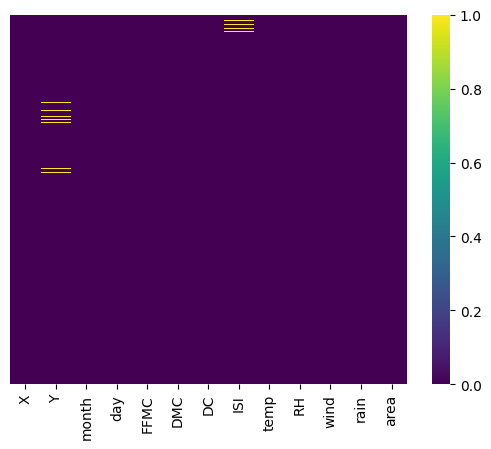

In [13]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

In [14]:
def check_missing(x):
    x= x.isnull().sum()*100/ len(x)
    x= x[x>0]
    x= x.sort_values(ascending= False)
    return x
check_missing(df)

Y      1.547389
ISI    0.967118
dtype: float64

## Filling Missing Values


In [15]:
df["Y"]

0      5.0
1      4.0
2      4.0
3      6.0
4      6.0
      ... 
512    3.0
513    4.0
514    4.0
515    4.0
516    3.0
Name: Y, Length: 517, dtype: float64

In [16]:
df["Y"].describe()

count    509.000000
mean       4.292731
std        1.233859
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: Y, dtype: float64

<Axes: xlabel='Y', ylabel='Density'>

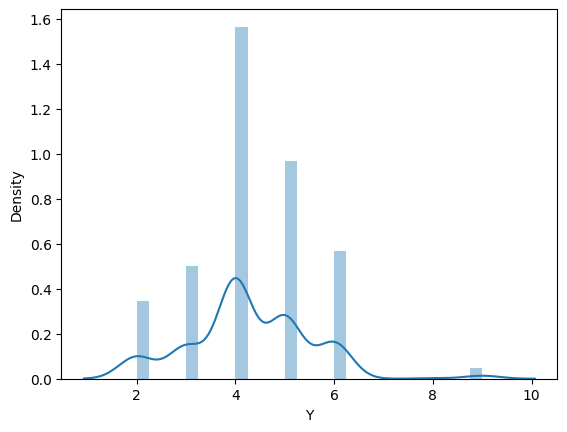

In [17]:
sns.distplot(df["Y"])    ### to see graph

In [18]:
df["Y"] = df["Y"].fillna(4.00)

In [19]:
df["ISI"]

0       NaN
1       6.7
2       6.7
3       9.0
4       9.6
       ... 
512     1.9
513     1.9
514     1.9
515    11.3
516     1.1
Name: ISI, Length: 517, dtype: float64

In [20]:
df["ISI"].describe()

count    512.000000
mean       9.050391
std        4.571613
min        0.000000
25%        6.500000
50%        8.400000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

<Axes: xlabel='ISI', ylabel='Density'>

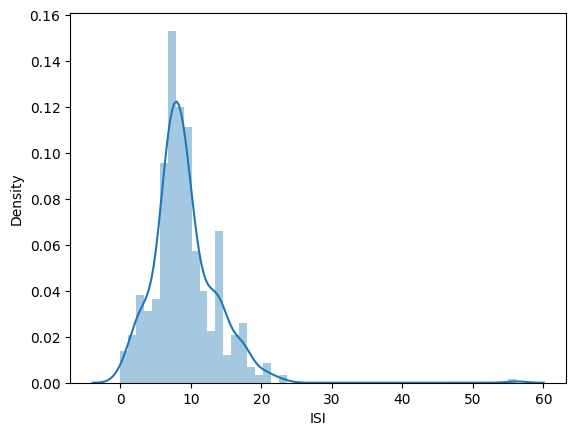

In [21]:
sns.distplot(df["ISI"])    ### to see graph

In [22]:
df["ISI"].quantile([.001,.999]) 

0.001     0.2044
0.999    39.0326
Name: ISI, dtype: float64

In [23]:
df[(df["ISI"] > 0) & (df["ISI"] <25 )]["ISI"].describe()## for Extra Acu

count    510.000000
mean       8.975882
std        4.057861
min        0.400000
25%        6.500000
50%        8.400000
75%       10.950000
max       22.700000
Name: ISI, dtype: float64

In [24]:
df["ISI"] =df["ISI"].fillna(8.400)

In [25]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

***Doesn't have any null values***

# Explorartory Data Analysis (EDA)


***Uniqueness***

In [26]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:   {num_distinct_values} distinct values")

X:   9 distinct values
Y:   7 distinct values
month:   12 distinct values
day:   7 distinct values
FFMC:   106 distinct values
DMC:   215 distinct values
DC:   219 distinct values
ISI:   118 distinct values
temp:   192 distinct values
RH:   75 distinct values
wind:   21 distinct values
rain:   7 distinct values
area:   251 distinct values


## Visualization : Histogram of area distribution

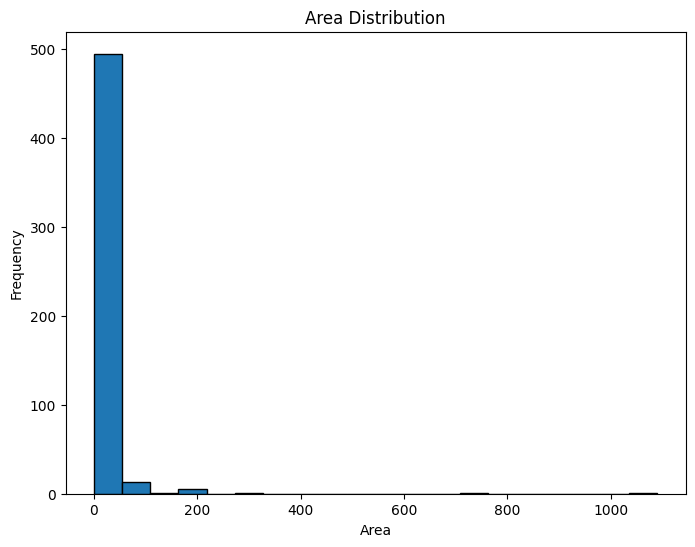

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area Distribution')
plt.show()

## Visualization : Bar plot of month's distribution

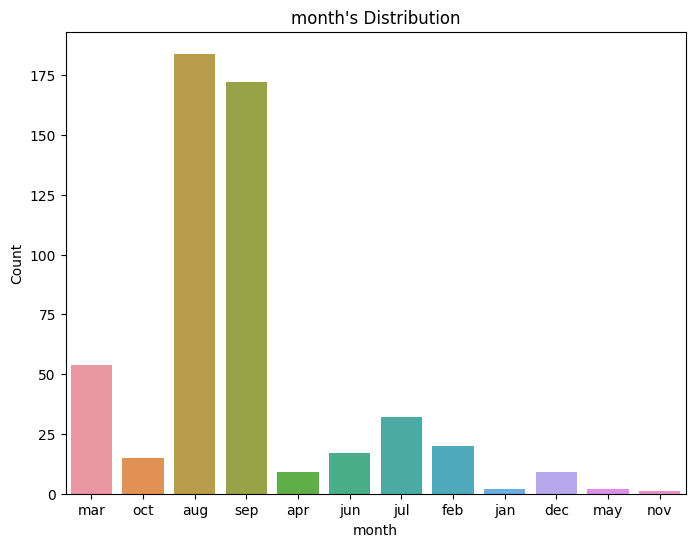

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='month')
plt.xlabel('month')
plt.ylabel('Count')
plt.title("month's Distribution")
plt.show()

## Visualization : Histogram of DC values

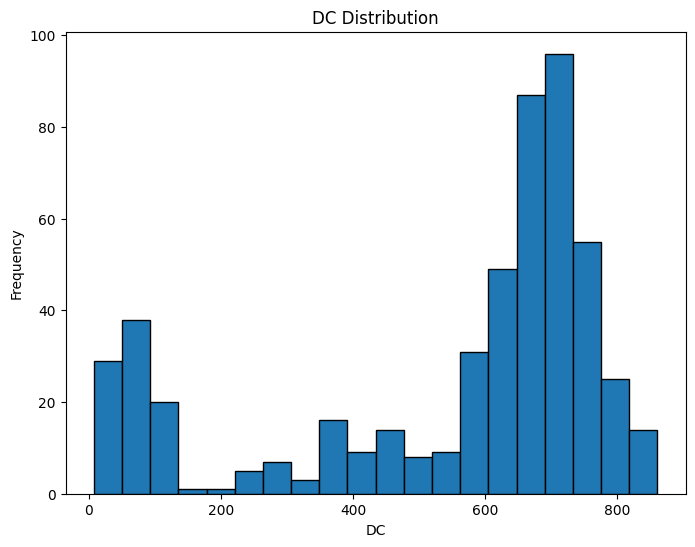

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['DC'], bins=20, edgecolor='black')
plt.xlabel('DC')
plt.ylabel('Frequency')
plt.title('DC Distribution')
plt.show()

## Visualization : Bar plot of the number of X(x-axis spatial coordinate within the Montesinho park map: 1 to 9)

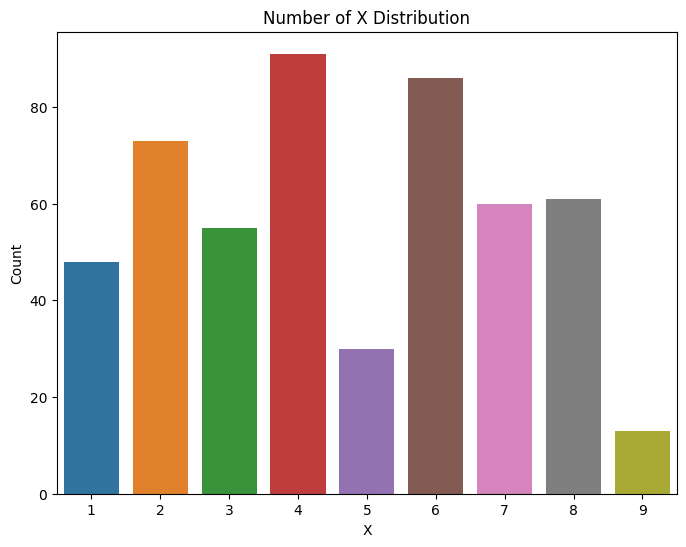

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='X')
plt.xlabel('X')
plt.ylabel('Count')
plt.title('Number of X Distribution')
plt.show()

## Visualization : Bar plot of the number of Y(y-axis spatial coordinate within the Montesinho park map: 1 to 9)

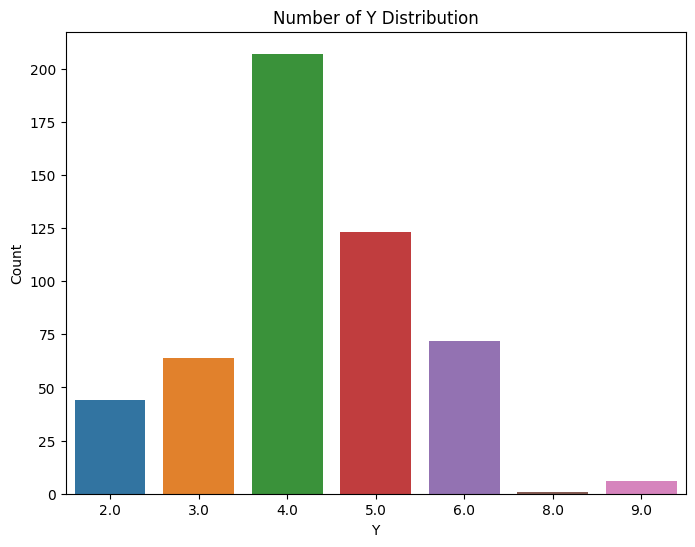

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Y')
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Number of Y Distribution')
plt.show()

## Visualization : Pie chart of Day's distribution

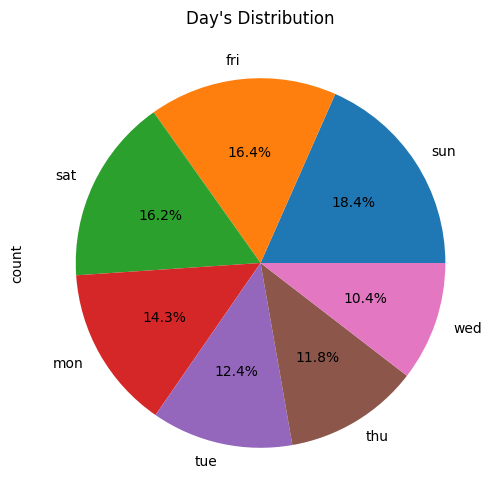

In [32]:
plt.figure(figsize=(8, 6))
df['day'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Day's Distribution")
plt.show()

## Visualization : Box plot of DC

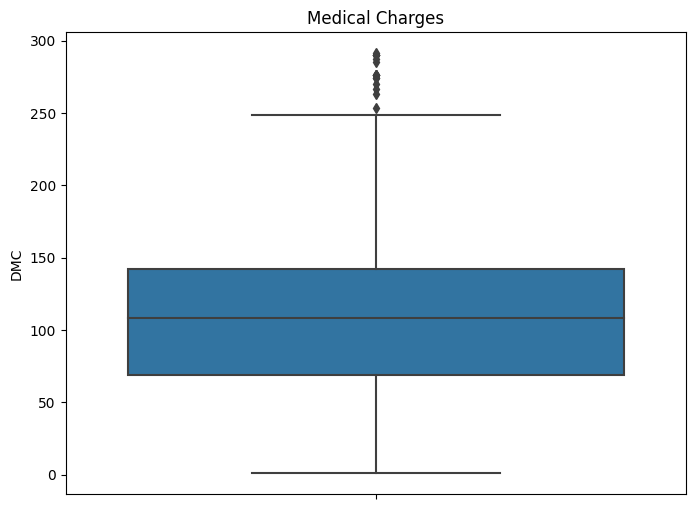

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='DMC')
plt.ylabel('DMC')
plt.title('Medical Charges')
plt.show()

In [34]:
df

X    Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5.0   mar  fri  86.2   26.2   94.3   8.4   8.2  51   6.7   0.0   0.00
1    7  4.0   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4.0   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6.0   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6.0   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  ..  ...   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3.0   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4.0   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4.0   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4.0   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3.0   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

## Visualization : Scatter plot of X vs. wind

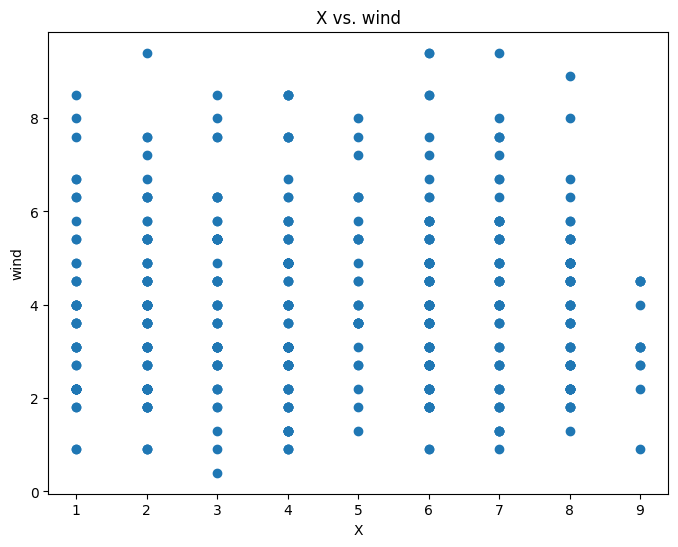

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['wind'])
plt.xlabel('X')
plt.ylabel('wind')
plt.title('X vs. wind')
plt.show()

## Visualization : Box plot of x grouped by day's

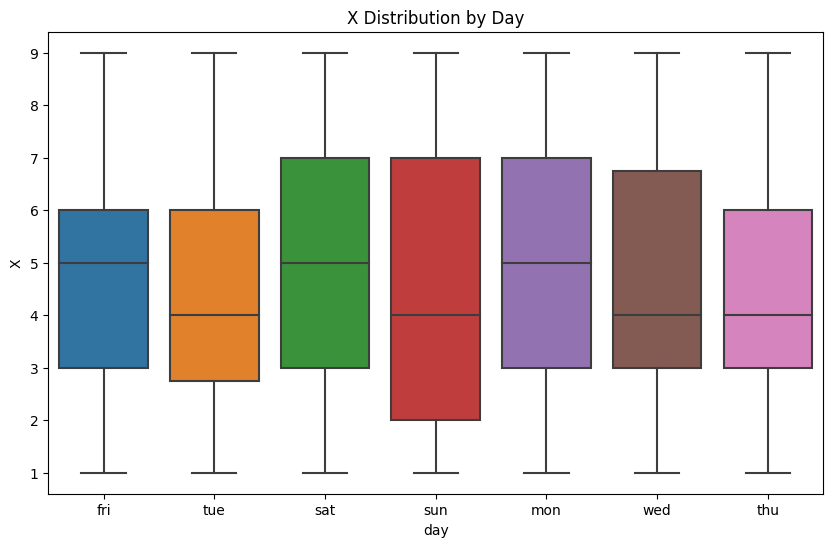

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='X')
plt.xlabel('day')
plt.ylabel('X')
plt.title('X Distribution by Day')
plt.show()

<Figure size 1000x600 with 0 Axes>

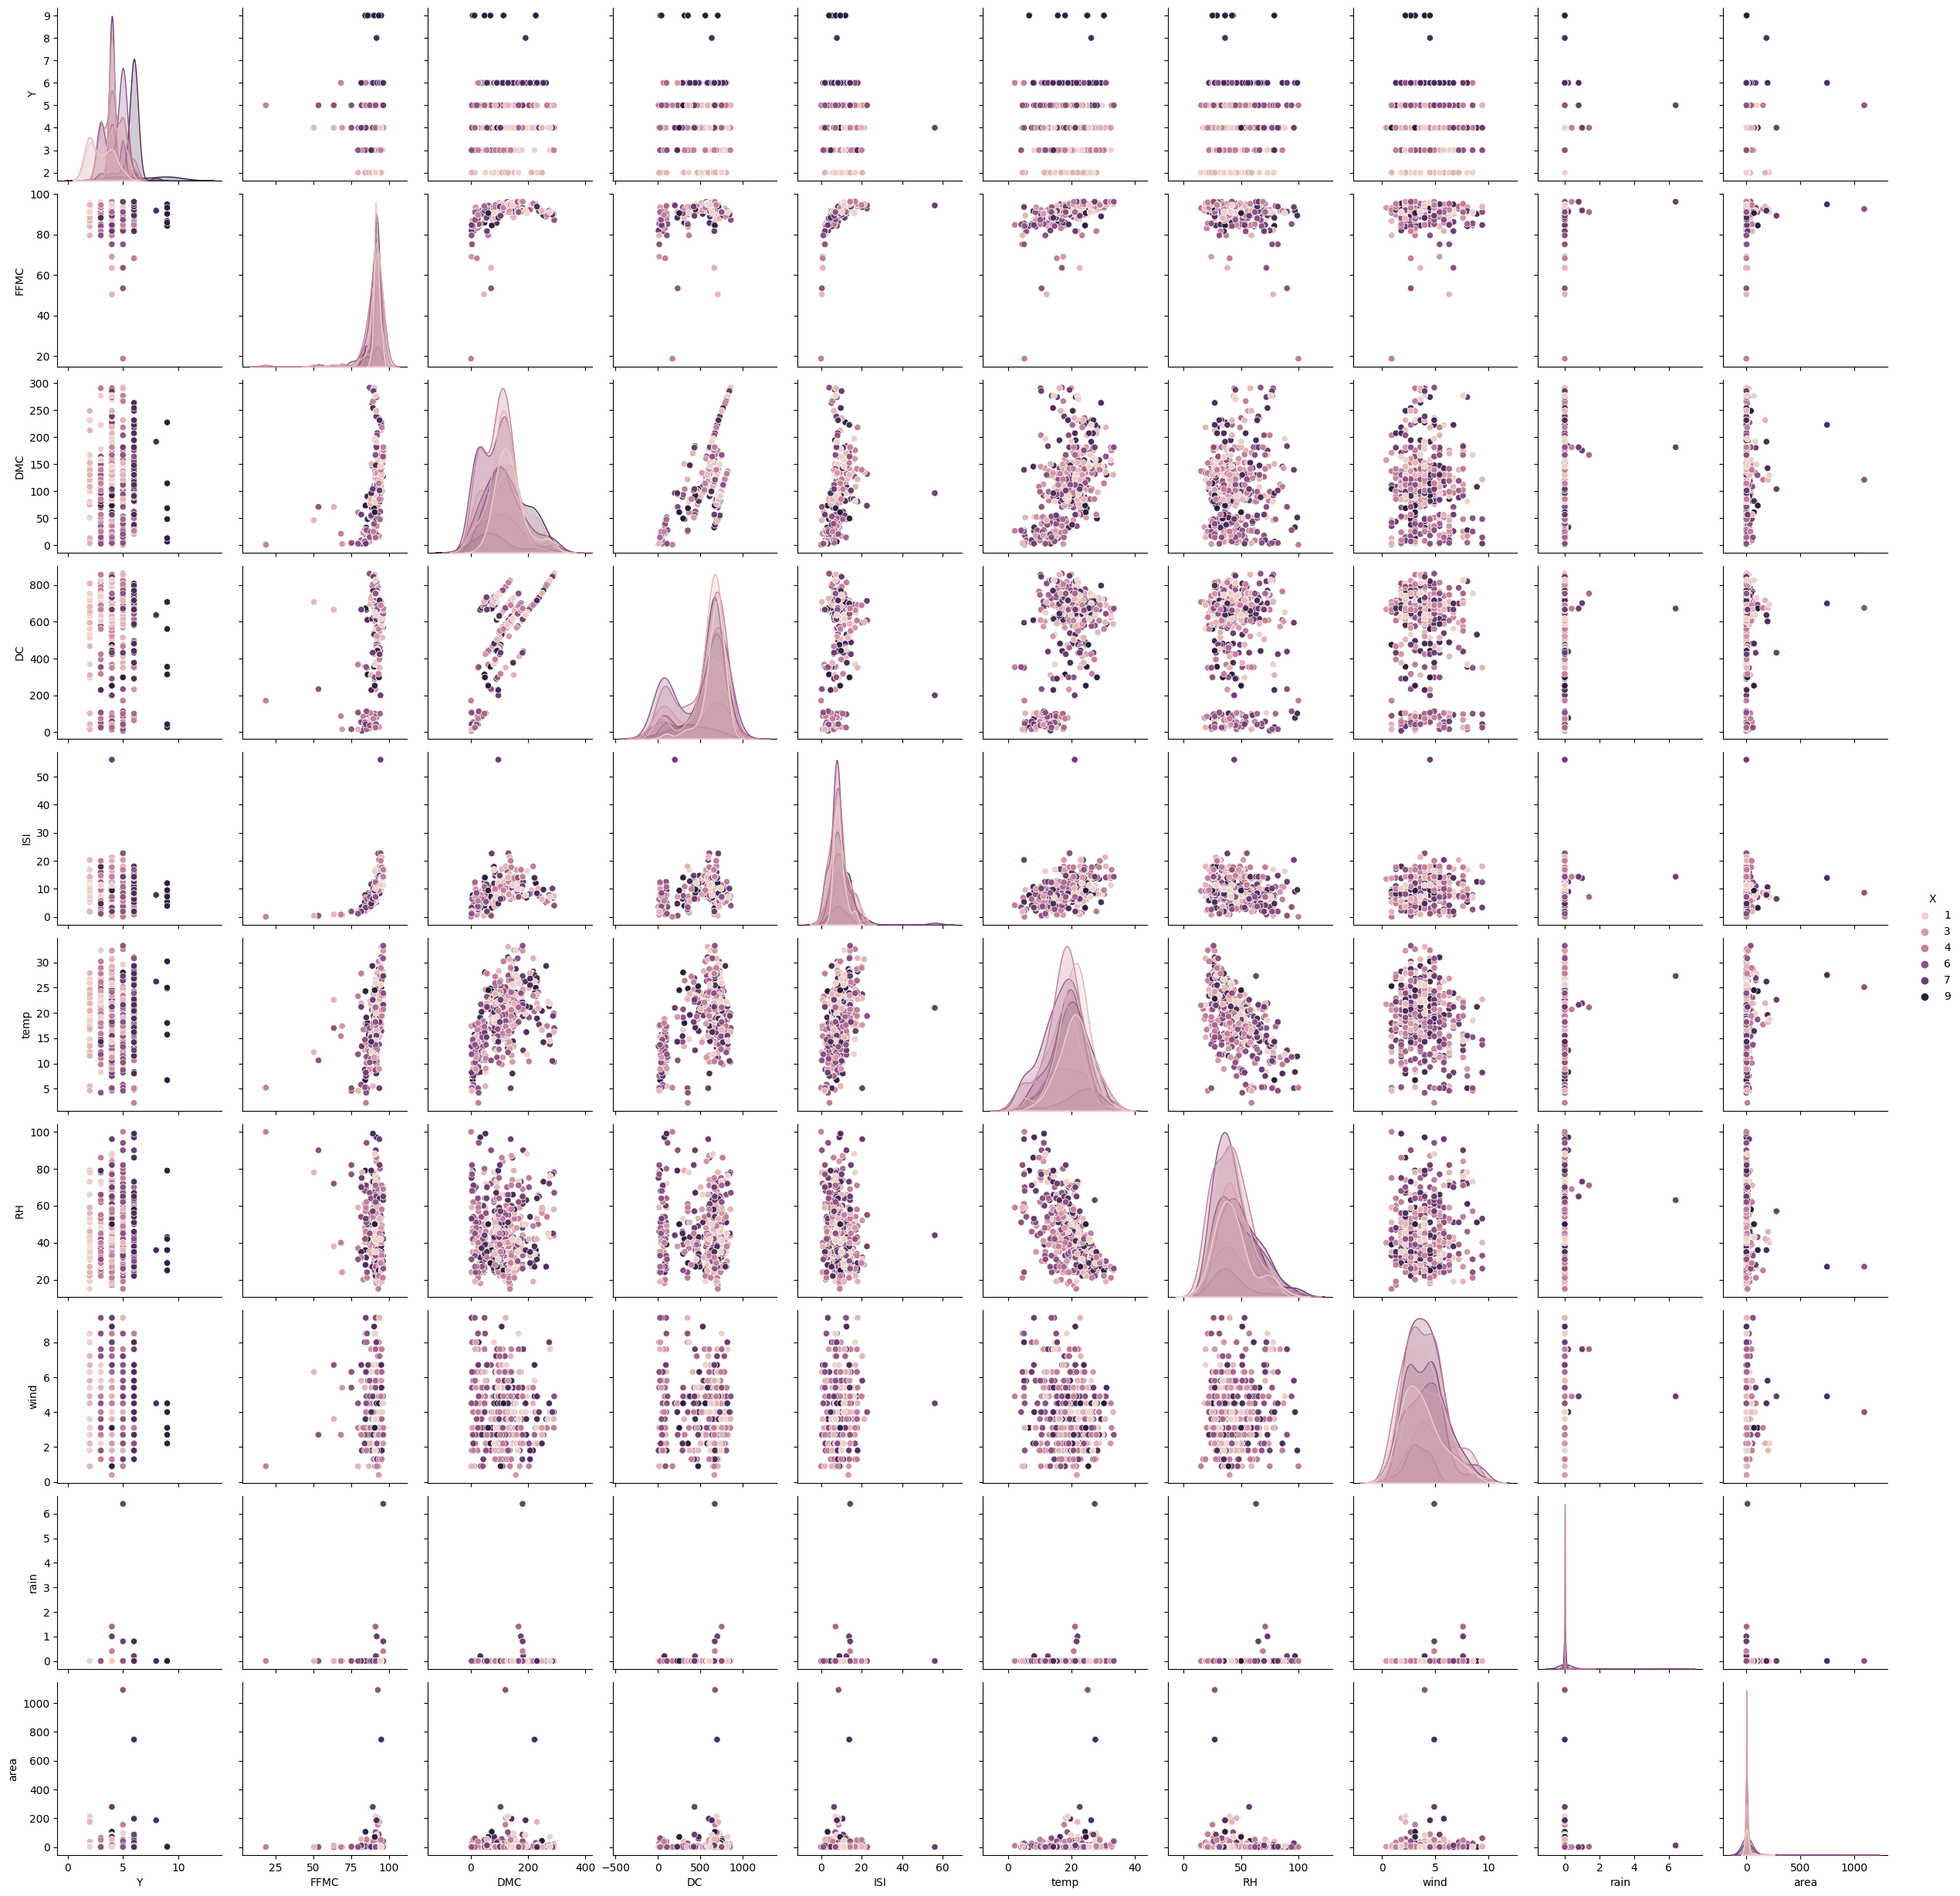

In [37]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='X')
plt.show()

## # Visualization : Correlation 

In [38]:
dff = df[["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]].copy()  ### copy numarical col in dff
## dff= df.drop(["day","month"],axis=1)

<Axes: >

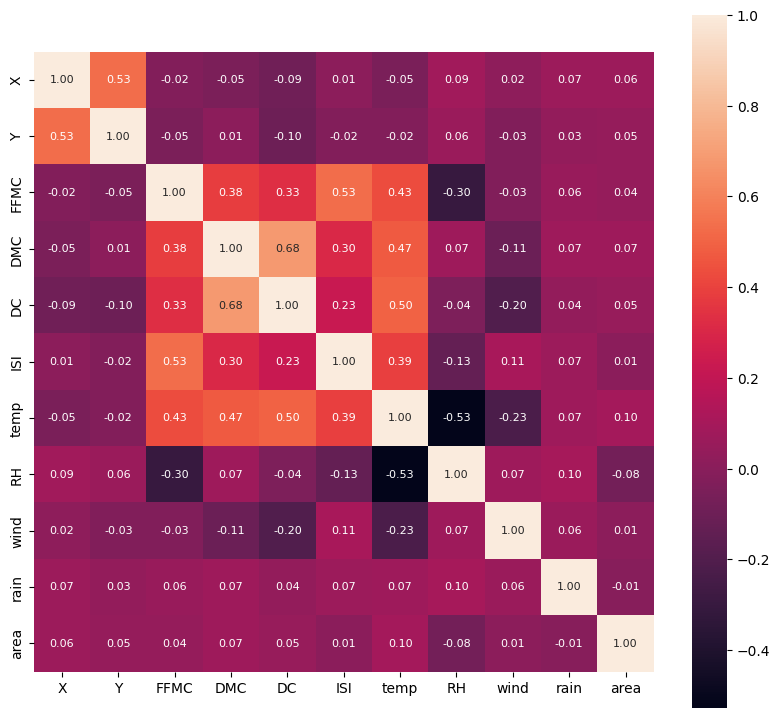

In [39]:
corr = dff.corr()

plt.figure(figsize = (10,9))
sns.heatmap(corr,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

## Visualization : Histogram

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

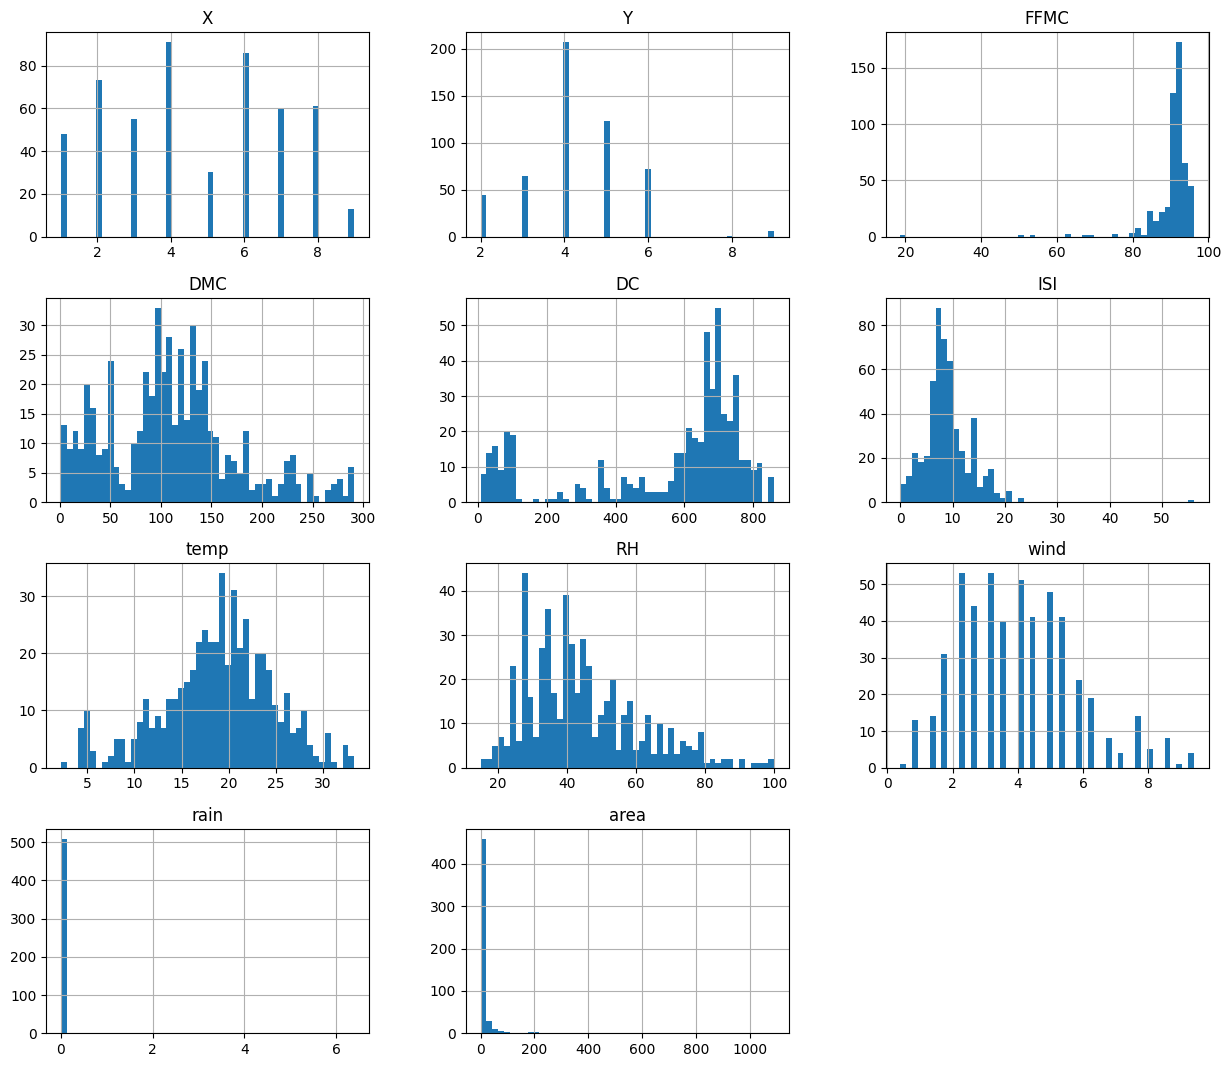

In [40]:
df.hist(figsize=(15,13),bins=50)

In [41]:
df

X    Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5.0   mar  fri  86.2   26.2   94.3   8.4   8.2  51   6.7   0.0   0.00
1    7  4.0   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4.0   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6.0   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6.0   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  ..  ...   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3.0   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4.0   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4.0   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4.0   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3.0   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

# Train Test Split

In [42]:
categorical_cols = ["month","day"]
encoder = OneHotEncoder(drop="first",sparse= False)   ####OneHotEncoder for categorical col
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns = encoder.get_feature_names_out(categorical_cols))

In [43]:
encoder_cols

month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        0.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
512        1.0        0.0        0.0        0.0        0.0        0.0   
513        1.0        0.0        0.0        0.0        0.0        0.0   
514        1.0        0.0        0.0        0.0        0.0        0.0   
515        1.0        0.0        0.0        0.0        0.0        0.0   
516        0.0        0.0        0.0        0.0        0.0        0.0   

     month_mar  month_may  month_nov  month_oct  month_sep  day_mon  day_sat  \
0          1.0        0.0        0.0        0.0        0.0      0.0      0.0   
1          0.0        0.0        0.0        1.0        0.0      0.0      0.0   
2          0.0        0.0        0.0        1.0        0.0      0.0      1.0   
3          1.0        0.0        0.0        0.0        0.0      0.0      0.0   
4          1.0        0.0        0.0        0.0        0.0      0.0      0.0   
..         ...        ...        ...        ...        ...      ...      ...   
512        0.0        0.0        0.0        0.0        0.0      0.0      0.0   
513        0.0        0.0        0.0        0.0        0.0      0.0      0.0   
514        0.0        0.0        0.0        0.0        0.0      0.0      0.0   
515        0.0        0.0        0.0        0.0        0.0      0.0      1.0   
516        0.0        0.0        1.0        0.0        0.0      0.0      0.0   

     day_sun  day_thu  day_tue  day_wed  
0        0.0      0.0      0.0      0.0  
1        0.0      0.0      1.0      0.0  
2        0.0      0.0      0.0      0.0  
3        0.0      0.0      0.0      0.0  
4        1.0      0.0      0.0      0.0  
..       ...      ...      ...      ...  
512      1.0      0.0      0.0      0.0  
513      1.0      0.0      0.0      0.0  
514      1.0      0.0      0.0      0.0  
515      0.0      0.0      0.0      0.0  
516      0.0      0.0      1.0      0.0  

[517 rows x 17 columns]

In [44]:
num_cols = ["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
scaler = StandardScaler()       ##### StandardScaler for numarical col
scaled_cols = pd.DataFrame(scaler.fit_transform(df[num_cols]),columns = (num_cols))

In [45]:
scaled_cols

X         Y      FFMC       DMC        DC       ISI      temp  \
0    1.008313  0.581722 -0.805959 -1.323326 -1.830477 -0.141702 -1.842640   
1    1.008313 -0.235534 -0.008102 -1.179541  0.488891 -0.515702 -0.153278   
2    1.008313 -0.235534 -0.008102 -1.049822  0.560715 -0.515702 -0.739383   
3    1.440925  1.398979  0.191362 -1.212361 -1.898266 -0.009702 -1.825402   
4    1.440925  1.398979 -0.243833 -0.931043 -1.798600  0.122298 -1.291012   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289524 -1.052791 -1.640083 -0.846648  0.474768 -1.571702  1.536084   
513 -1.154748 -0.235534 -1.640083 -0.846648  0.474768 -1.571702  0.519019   
514  1.008313 -0.235534 -1.640083 -0.846648  0.474768 -1.571702  0.398350   
515 -1.587360 -0.235534  0.680957  0.549003  0.269382  0.496298  1.156839   
516  0.575701 -1.052791 -2.020879 -1.685913 -1.780442 -1.747702 -1.222058   

           RH      wind      rain  
0    0.411724  1.498614 -0.073268  
1   -0.692456 -1.741756 -0.073268  
2   -0.692456 -1.518282 -0.073268  
3    3.233519 -0.009834  0.603155  
4    3.356206 -1.238940 -0.073268  
..        ...       ...       ...  
512 -0.753800 -0.736124 -0.073268  
513  1.638592  0.995798 -0.073268  
514  1.577248  1.498614 -0.073268  
515 -0.140366 -0.009834 -0.073268  
516 -0.815143  0.269509 -0.073268  

[517 rows x 10 columns]

In [46]:
x= pd.concat([encoder_cols,scaled_cols], axis=1)
y = df['area'].apply(lambda x: 1 if x > 0 else 0) # will create a new col that will suggest if it is a large fire or small fire

In [47]:
x

month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        0.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
512        1.0        0.0        0.0        0.0        0.0        0.0   
513        1.0        0.0        0.0        0.0        0.0        0.0   
514        1.0        0.0        0.0        0.0        0.0        0.0   
515        1.0        0.0        0.0        0.0        0.0        0.0   
516        0.0        0.0        0.0        0.0        0.0        0.0   

     month_mar  month_may  month_nov  month_oct  ...         X         Y  \
0          1.0        0.0        0.0        0.0  ...  1.008313  0.581722   
1          0.0        0.0        0.0        1.0  ...  1.008313 -0.235534   
2          0.0        0.0        0.0        1.0  ...  1.008313 -0.235534   
3          1.0        0.0        0.0        0.0  ...  1.440925  1.398979   
4          1.0        0.0        0.0        0.0  ...  1.440925  1.398979   
..         ...        ...        ...        ...  ...       ...       ...   
512        0.0        0.0        0.0        0.0  ... -0.289524 -1.052791   
513        0.0        0.0        0.0        0.0  ... -1.154748 -0.235534   
514        0.0        0.0        0.0        0.0  ...  1.008313 -0.235534   
515        0.0        0.0        0.0        0.0  ... -1.587360 -0.235534   
516        0.0        0.0        1.0        0.0  ...  0.575701 -1.052791   

         FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -0.805959 -1.323326 -1.830477 -0.141702 -1.842640  0.411724  1.498614   
1   -0.008102 -1.179541  0.488891 -0.515702 -0.153278 -0.692456 -1.741756   
2   -0.008102 -1.049822  0.560715 -0.515702 -0.739383 -0.692456 -1.518282   
3    0.191362 -1.212361 -1.898266 -0.009702 -1.825402  3.233519 -0.009834   
4   -0.243833 -0.931043 -1.798600  0.122298 -1.291012  3.356206 -1.238940   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.640083 -0.846648  0.474768 -1.571702  1.536084 -0.753800 -0.736124   
513 -1.640083 -0.846648  0.474768 -1.571702  0.519019  1.638592  0.995798   
514 -1.640083 -0.846648  0.474768 -1.571702  0.398350  1.577248  1.498614   
515  0.680957  0.549003  0.269382  0.496298  1.156839 -0.140366 -0.009834   
516 -2.020879 -1.685913 -1.780442 -1.747702 -1.222058 -0.815143  0.269509   

         rain  
0   -0.073268  
1   -0.073268  
2   -0.073268  
3    0.603155  
4   -0.073268  
..        ...  
512 -0.073268  
513 -0.073268  
514 -0.073268  
515 -0.073268  
516 -0.073268  

[517 rows x 27 columns]

In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: area, Length: 517, dtype: int64

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

# Model Building

In [50]:
scaler = StandardScaler()
x_trin = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
scaler

StandardScaler()

In [52]:
x_trin

array([[-0.74732226, -0.14054567, -0.18027756, ...,  0.66067453,
         0.77617805, -0.07126589],
       [-0.74732226, -0.14054567, -0.18027756, ...,  1.14554095,
         0.49997477, -0.07126589],
       [ 1.33811081, -0.14054567, -0.18027756, ...,  0.35763301,
         0.00280885, -0.07126589],
       ...,
       [-0.74732226, -0.14054567, -0.18027756, ..., -0.24845002,
         0.00280885, -0.07126589],
       [-0.74732226, -0.14054567, -0.18027756, ..., -0.30905832,
        -0.99152299, -0.07126589],
       [ 1.33811081, -0.14054567, -0.18027756, ..., -1.33939947,
         0.27901213, -0.07126589]])

In [53]:
x_test 

array([[-0.74732226, -0.14054567, -0.18027756, ...,  0.1151998 ,
         0.99714068, -0.07126589],
       [-0.74732226, -0.14054567, -0.18027756, ...,  0.41824132,
        -1.21248562, -0.07126589],
       [-0.74732226, -0.14054567, -0.18027756, ...,  0.41824132,
         0.27901213, -0.07126589],
       ...,
       [ 1.33811081, -0.14054567, -0.18027756, ..., -0.30905832,
         0.77617805, -0.07126589],
       [-0.74732226, -0.14054567, -0.18027756, ...,  0.1758081 ,
         0.49997477, -0.07126589],
       [ 1.33811081, -0.14054567, -0.18027756, ..., -1.15757456,
        -0.49435707, -0.07126589]])

In [54]:
svcm = SVC(kernel= 'linear')  ## linear,rbf,poly,sigmoid, we can applide

In [55]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [56]:
y_pred = svcm.predict(x_test)

In [57]:
acc= accuracy_score(y_test,y_pred)
acc

0.5384615384615384

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44        44
           1       0.60      0.62      0.61        60

    accuracy                           0.54       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.54      0.54      0.54       104



# Confusion Matrix

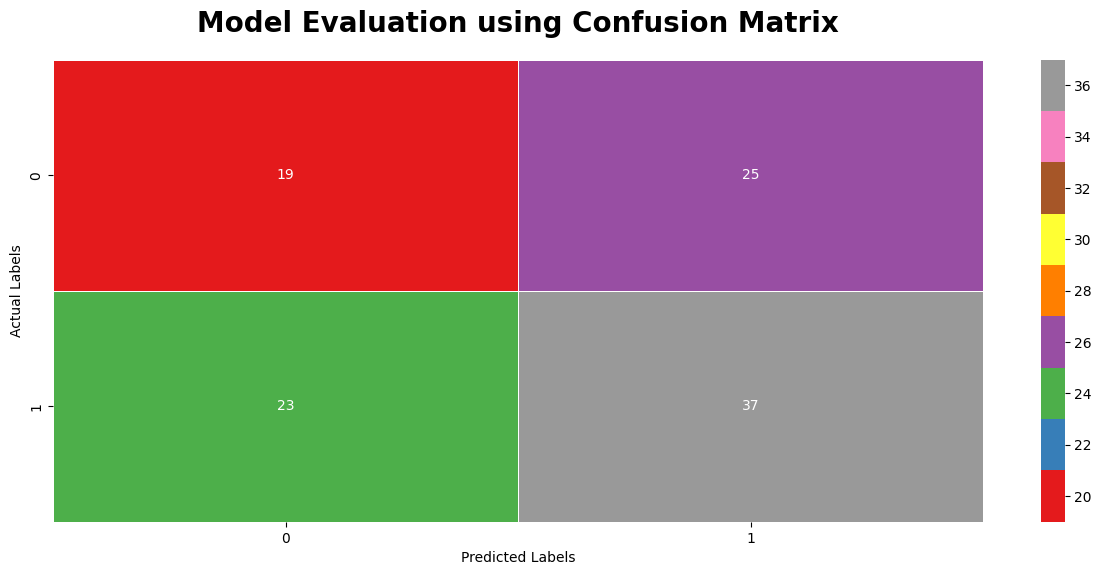

In [59]:
y_test_pred = svcm.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# AUC- ROC Curve and AUC- ROC Score

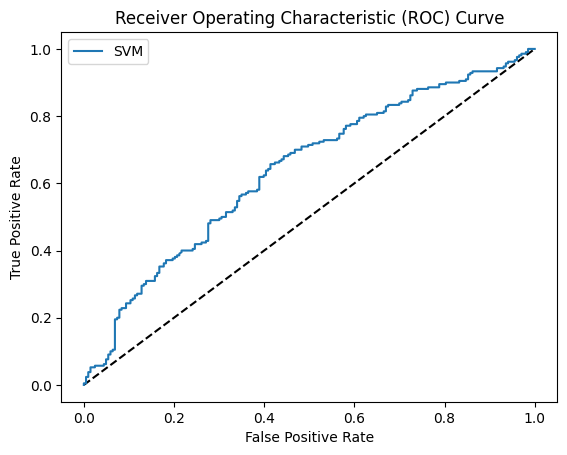

In [60]:
from sklearn import metrics
roc = svcm.decision_function(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, roc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

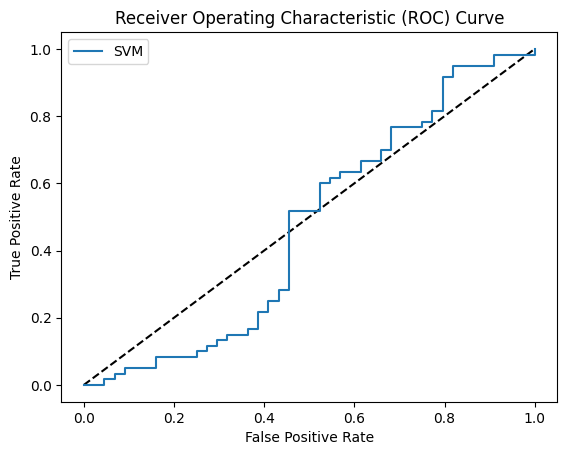

In [61]:
rocc = svcm.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rocc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [62]:
metrics.roc_auc_score(y_train,roc)

0.6382477128782548

In [63]:
metrics.roc_auc_score(y_test,rocc)

0.4708333333333333

In [64]:
print("Test Score:",metrics.roc_auc_score(y_test,y_pred))

Test Score: 0.5242424242424242


# GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.482 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.494 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.542 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.524 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.482 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.494 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.542 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.524 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.561 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.482 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.542 total time=   1.2s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.542 total time=   2.6s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.549 total time=   2.5s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.598 total time=   1.6s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.410 total time=   1.7s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.542 total time=   1.2s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.542 total time=   2.6s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.549 total time=   2.5s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.598 total time=   1.6s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.410 total time=   1.7s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.542 total time=   1.2s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.542 total time=   2.6s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [66]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [67]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        44
           1       0.59      0.85      0.70        60

    accuracy                           0.58       104
   macro avg       0.55      0.53      0.49       104
weighted avg       0.55      0.58      0.53       104



# RandomizedSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [69]:
svm = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', 'poly', etc.

param_dist = {
    'C': uniform(loc=0, scale=10),  # C parameter for regularization
    'gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(10)),  # Gamma parameter for 'rbf' kernel
}


In [70]:
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(x, y)  # X and y are your feature and target data, respectively


RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002B48C3D70D0>,
                                        'gamma': ['scale', 'auto',
                                                  0.9338267942413623,
                                                  0.29815838731683986,
                                                  0.04243827466114203,
                                                  0.7799612346263092,
                                                  0.38091364345097045,
                                                  0.8796475035442616,
                                                  0.06754240926416188,
                                                  0.06705628141395115,
                                                  0.3664375568476911,
                                                  0.18561741758235417]})

In [71]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [72]:
# Make predictions
y_pred = best_model.predict(x_test)

# Evaluate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6153846153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        44
           1       0.63      0.80      0.71        60

    accuracy                           0.62       104
   macro avg       0.60      0.58      0.58       104
weighted avg       0.61      0.62      0.60       104



# Naive Bayes Algo

## Train Test Split

In [73]:
a = df.drop(["area","month","day"],axis=1)
a

X    Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5.0  86.2   26.2   94.3   8.4   8.2  51   6.7   0.0
1    7  4.0  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4.0  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6.0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6.0  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  ..  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3.0  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4.0  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4.0  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4.0  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3.0  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 10 columns]

In [74]:
x= pd.concat([encoder_cols,a], axis=1)
y = df['area'].apply(lambda x: 1 if x > 0 else 0) # will create a new col that will suggest if it is a large fire or small fire

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [76]:
scaler = MinMaxScaler()
x_trin = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
print(x_train)

     month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
386        0.0        0.0        0.0        0.0        0.0        0.0   
56         0.0        0.0        0.0        0.0        0.0        0.0   
457        1.0        0.0        0.0        0.0        0.0        0.0   
60         0.0        0.0        0.0        0.0        0.0        0.0   
229        1.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
70         0.0        0.0        0.0        0.0        0.0        0.0   
277        0.0        1.0        0.0        0.0        0.0        0.0   
9          0.0        0.0        0.0        0.0        0.0        0.0   
359        0.0        0.0        0.0        0.0        0.0        0.0   
192        1.0        0.0        0.0        0.0        0.0        0.0   

     month_mar  month_may  month_nov  month_oct  ...  X    Y  FFMC    DMC  \
386        0.0        0.0        0.0        0.

In [78]:
print(np.shape(x_train),np.shape(x_test))

(413, 27) (104, 27)


# Model Building


In [79]:
bayes = naive_bayes.MultinomialNB()

In [80]:
bayes.fit(x_train, y_train)

MultinomialNB()

In [81]:
y_pred_bayes = bayes.predict(x_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (Naive Bayes):", accuracy_bayes)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_bayes))

Accuracy (Naive Bayes): 0.4423076923076923
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.38      0.52      0.44        44
           1       0.52      0.38      0.44        60

    accuracy                           0.44       104
   macro avg       0.45      0.45      0.44       104
weighted avg       0.46      0.44      0.44       104



In [82]:
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc*100))

Accuracy : 61.54%


# AUC- ROC Curve and AUC- ROC Score

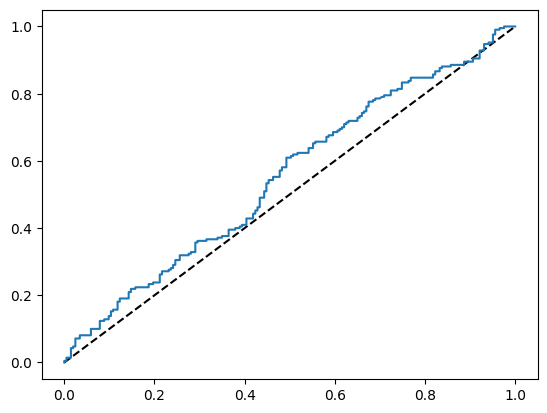

In [83]:
roc_c = bayes.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

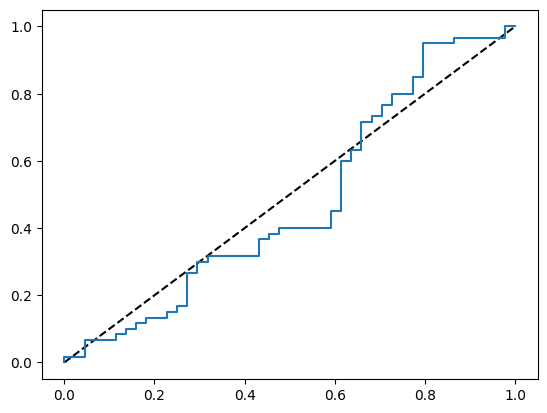

In [84]:
rocc_c = bayes.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

In [85]:
metrics.roc_auc_score(y_train,roc_c)

0.5507037297677693

In [86]:
metrics.roc_auc_score(y_test,rocc_c)

0.4784090909090909

# Confusion Matrix For Naive Bayes

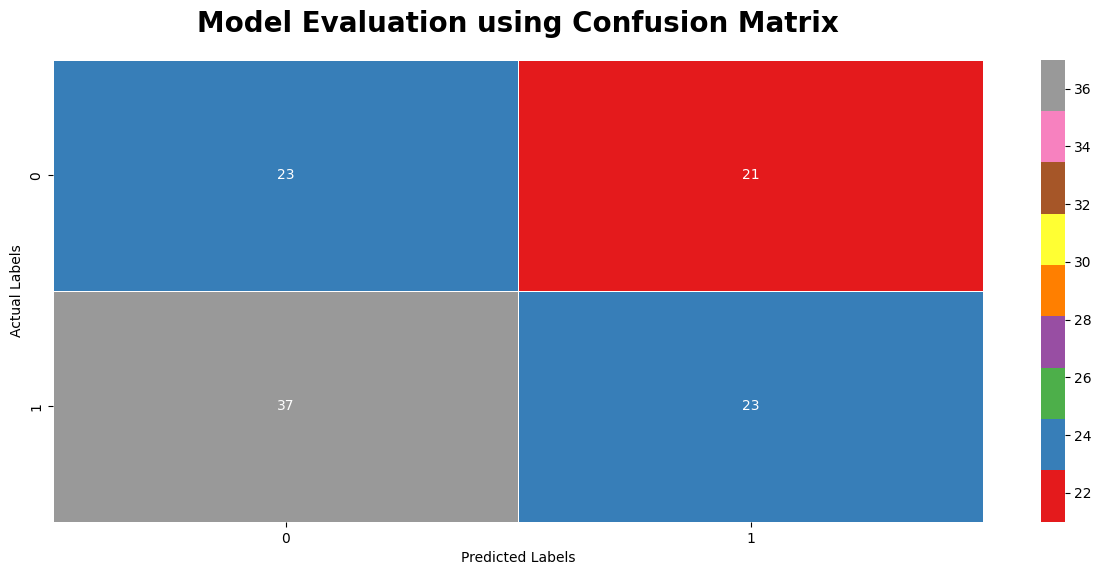

In [87]:
y_test_pred = bayes.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV For Naive Bayes

In [88]:
from sklearn.naive_bayes import BernoulliNB  # Import BernoulliNB class
from sklearn.model_selection import GridSearchCV
n_classes = len(np.unique(y_train))

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* (n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.530



In [89]:
grid_predictionss = bernoulli_nb_grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictionss)) 

              precision    recall  f1-score   support

           0       0.45      0.41      0.43        44
           1       0.59      0.63      0.61        60

    accuracy                           0.54       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.53      0.54      0.53       104



# RandomizedSearchCV For Naive Bayes

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their potential values
param_dist = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  # Laplace smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)

# Fit the model to the data to find the best hyperparameters
random_search.fit(x, y)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))


Best Hyperparameters:  {'fit_prior': True, 'alpha': 1.0}
Best Accuracy: 53.20%


In [91]:
random = random_search.predict(x_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, random))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.68      0.57        44
           1       0.67      0.47      0.55        60

    accuracy                           0.56       104
   macro avg       0.58      0.57      0.56       104
weighted avg       0.59      0.56      0.56       104

